In [134]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns

In [135]:
datos = pd.read_csv('medical_students_dataset.csv')

In [136]:
datos

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


In [137]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


podemos observar que ahi 200 000 de registro y tenemos 20000 datos faltantes en cada una de las columnas pero no quiere decir que sea la misma columnas

In [138]:
datos.isna().sum()

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

In [139]:
df_filas = datos.dropna(axis=0)
df_filas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50793 entries, 2 to 199998
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student ID      50793 non-null  float64
 1   Age             50793 non-null  float64
 2   Gender          50793 non-null  object 
 3   Height          50793 non-null  float64
 4   Weight          50793 non-null  float64
 5   Blood Type      50793 non-null  object 
 6   BMI             50793 non-null  float64
 7   Temperature     50793 non-null  float64
 8   Heart Rate      50793 non-null  float64
 9   Blood Pressure  50793 non-null  float64
 10  Cholesterol     50793 non-null  float64
 11  Diabetes        50793 non-null  object 
 12  Smoking         50793 non-null  object 
dtypes: float64(9), object(4)
memory usage: 5.4+ MB


Eliminamos las filas de los datos faltantes que nos ocasiona problemas

> Añadir blockquote



In [140]:
df_filas.isna().sum()

Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

si bien este es un metodo no es la unica manera y cada metodo tiene sus pro y sus contras ya que aqui tenemos una perdida de datos y esto puede llegar a limitar el uso de este notebook.

In [141]:
df_ms = df_filas.drop_duplicates()

In [142]:
df_ms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44337 entries, 2 to 199998
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student ID      44337 non-null  float64
 1   Age             44337 non-null  float64
 2   Gender          44337 non-null  object 
 3   Height          44337 non-null  float64
 4   Weight          44337 non-null  float64
 5   Blood Type      44337 non-null  object 
 6   BMI             44337 non-null  float64
 7   Temperature     44337 non-null  float64
 8   Heart Rate      44337 non-null  float64
 9   Blood Pressure  44337 non-null  float64
 10  Cholesterol     44337 non-null  float64
 11  Diabetes        44337 non-null  object 
 12  Smoking         44337 non-null  object 
dtypes: float64(9), object(4)
memory usage: 4.7+ MB


como podemos obervar teniamos datos duplicados precedimos a eliminar dichos datos duplicados

In [143]:
df_ms

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
7,8.0,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No
11,12.0,34.0,Female,182.416302,76.371050,AB,22.950992,98.118274,86.0,97.0,247.0,No,No
19,20.0,31.0,Male,166.489929,49.955569,B,18.022207,98.809750,82.0,96.0,223.0,No,No
22,23.0,29.0,Female,179.909041,90.679436,AB,28.015787,98.782269,81.0,108.0,227.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199950,99951.0,21.0,Male,164.162060,55.931108,B,20.754288,98.121215,94.0,124.0,123.0,No,No
199952,99953.0,33.0,Female,172.472138,85.476345,B,28.734791,98.245304,96.0,107.0,228.0,No,No
199986,99987.0,34.0,Male,165.651315,93.099756,A,33.928040,97.862209,62.0,100.0,205.0,No,No
199992,99993.0,34.0,Male,161.590030,90.877589,B,34.803881,98.728836,70.0,96.0,208.0,No,No


In [144]:
df_mss = df_ms.drop(['Blood Type', 'BMI'], axis=1)

In [145]:
df_mss

,Student ID,Age,Gender,Height,Weight,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,3.0,32.0,Female,182.537664,55.741083,98.260293,76.0,130.0,216.0,Yes,No
7,8.0,28.0,Male,186.489402,52.389752,98.227788,85.0,123.0,128.0,No,No
11,12.0,34.0,Female,182.416302,76.371050,98.118274,86.0,97.0,247.0,No,No
19,20.0,31.0,Male,166.489929,49.955569,98.809750,82.0,96.0,223.0,No,No
22,23.0,29.0,Female,179.909041,90.679436,98.782269,81.0,108.0,227.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
199950,99951.0,21.0,Male,164.162060,55.931108,98.121215,94.0,124.0,123.0,No,No
199952,99953.0,33.0,Female,172.472138,85.476345,98.245304,96.0,107.0,228.0,No,No
199986,99987.0,34.0,Male,165.651315,93.099756,97.862209,62.0,100.0,205.0,No,No
199992,99993.0,34.0,Male,161.590030,90.877589,98.728836,70.0,96.0,208.0,No,No


In [146]:
encoder = LabelEncoder()
df_mss['Gender'] = encoder.fit_transform(df_mss['Gender'])
df_mss['Diabetes'] = encoder.fit_transform(df_mss['Diabetes'])
df_mss['Smoking'] = encoder.fit_transform(df_mss['Smoking'])

In [147]:
df_mss

,Student ID,Age,Gender,Height,Weight,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,3.0,32.0,0,182.537664,55.741083,98.260293,76.0,130.0,216.0,1,0
7,8.0,28.0,1,186.489402,52.389752,98.227788,85.0,123.0,128.0,0,0
11,12.0,34.0,0,182.416302,76.371050,98.118274,86.0,97.0,247.0,0,0
19,20.0,31.0,1,166.489929,49.955569,98.809750,82.0,96.0,223.0,0,0
22,23.0,29.0,0,179.909041,90.679436,98.782269,81.0,108.0,227.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
199950,99951.0,21.0,1,164.162060,55.931108,98.121215,94.0,124.0,123.0,0,0
199952,99953.0,33.0,0,172.472138,85.476345,98.245304,96.0,107.0,228.0,0,0
199986,99987.0,34.0,1,165.651315,93.099756,97.862209,62.0,100.0,205.0,0,0
199992,99993.0,34.0,1,161.590030,90.877589,98.728836,70.0,96.0,208.0,0,0


Al cambiar el genero diabetes y smoking a valores numericos, esto para ciertos analisis es algo mas practico a la hora de analizar.

> Añadir blockquote



In [148]:
def plotter(df,x,y):
    if df[x].dtype=='object' and df[y].dtype=='float':
        sns.barplot(x=x,y=y,data=df)
    elif df[x].dtype=='float' and df[y].dtype=='float':
        sns.scatterplot(x=x,y=y,data=df)
    else:
        pd.crosstab(df[x],df[y]).plot(kind='bar')


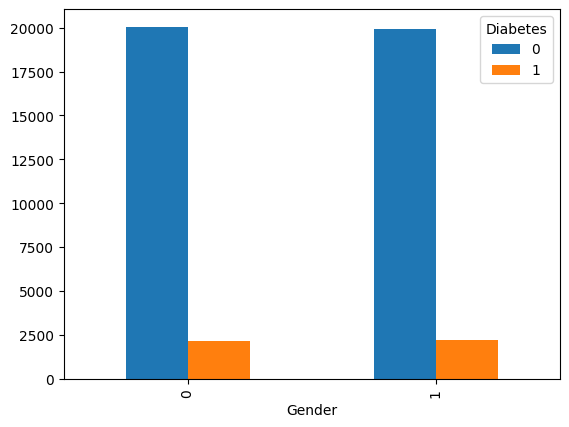

In [149]:
plotter(df_mss,'Gender','Diabetes')

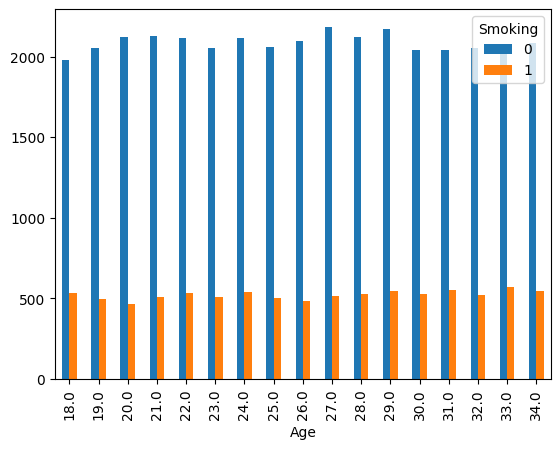

In [150]:
plotter(df_mss,'Age','Smoking')
